# **Linear Partial Differential Equations**

---

### **Introduction**
This notebook goes over how to solve some linear partial differential equations (PDEs) on specialized bounded domains using the Fourier series.

---

### **Author**
**Junichi Koganemaru**  

---

### **References**

---

### **Recommended Reading and Resources**



---

### **Last Updated**
**April 18, 2025**

In [21]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from sympy import symbols, integrate, sin, cos, pi
import matplotlib.animation as animation


### Linear partial differential equations

Now we turn to the study of a few basic linear PDEs on bounded domains. The three most important linear PDEs that one encounters in practice are:

- (elliptic) the two-dimensional Laplace's equation:
    $$
    -\Delta u(x, y) := -\left( \partial_{xx} u(x, y) + \partial_{yy} u(x, y) \right) = 0, \quad (x, y) \in \mathbb{R}^2
    $$
Solutions to Laplace's equation are called **harmonic functions**. These solutions play an important role in both pure and applied mathematics. In applications, harmonic functions can be used to model steady-state heat conduction, electrostatics, and fluid flow.
- (parabolic) the one-dimensional heat equation:
    $$
    \partial_t u(x, t) - k \partial_{xx} u(x, t) = 0, \quad x \in \mathbb{R}, t \geq 0, k > 0
    $$
The heat equation describes how the distribution of heat (or temperature) in a given region changes over time. The constant $k$ is a physical parameter that measures the thermal diffusivity of the medium.
- (hyperbolic) the one-dimensional wave equation:
    $$
    \partial_{tt} u(x, t) - c^2 \partial_{xx} u(x, t) = 0, \quad x \in \mathbb{R}, t \geq 0
    $$
The wave equation describes how waves propagate through a medium, and the constant $c$ is the speed of the wave in the medium. The wave equation is intricately related to fundamental equations arising in physics, such as Maxwell's equations and the Schrödinger equation.

Unlike ODEs, which we saw can all be studied as a first order system, PDEs are more complicated and do not admit a universal structure that can be used to study them. This makes them much more difficult to study than ODEs.

The rough classification of PDEs into elliptic, parabolic, and hyperbolic type is chosen as solution to these types of PDEs often exhibit similar properties can be studied using similar techniques.

PDEs are extremely important in practice as many physical phenomena, such as heat conduction, fluid flow, wave propagation, diffusion, etc., can all be modeled using PDEs. We note that PDEs are often augmented with various types of initial and boundary conditions describing the underlying physical constraints of the problem.

To construct general solutions to these equations, we'll need to utilize the following tools.

* Some basic first order and second ODE theory we developed earlier in the course.
* The **superposition principle**, which roughly says that if you have a linear PDE and $u_1, u_2$ are two solutions to the PDE, then their sum $u_1 + u_2$ is also a solution to the PDE. In our case, we'll be constructing an infinite family of solutions $\{ u_n \}_{n=1}^\infty$, and by using the superposition principle, we can build a new solution (which turns out to be the unique solution) by considering their sum:
    $$
    u(x) = \sum_{n=1}^\infty u_n(x).
    $$
    Since we're taking an infinite sum, in principle, we have to worry about convergence. This is outside the scope of this course, so we won't be discussing it in detail.
* To construct the aforementioned solutions $u_n$'s, we'll need the method of **separation of variables**.
* Some basic facts about Fourier series.

Solutions to PDEs on bounded domains will depend on:

1. The structure of the PDE itself.
2. The geometry of the underlying domain.
3. The types of boundary conditions imposed on the domain.

*All three are equally important.*

### Separation of variables 

In this subsection, we aim to solve the wave and heat equations via the method of **separation of variables**. We first consider specialized solutions of the form $u: [0,L] \times I \to \mathbb{R}$ in the form of $u(x,t) = X(x) T(t)$ to the heat and wave equations on a finite interval $[0, L]$, where $I \subset \mathbb{R}$ is a time interval. 

#### Separation of variables for the heat equation

Consider the heat equation with homogeneous Dirichlet conditions,
$$
\begin{cases}
\partial_t u(x, t) = k \partial_{xx} u(x, t), \quad &  x \in (0, L), t \geq 0, k > 0 \\
u(0, t) = 0 = u(L, t),  \quad & t \geq 0 \quad \text{(homogeneous boundary conditions)} \\
u(x, 0) = f(x),  \quad & x \in (0, L) \quad \text{(initial condition)}.
\end{cases}
$$

The boundary conditions require that the temperature at the endpoints of the interval is held at zero for all time. The initial condition specifies the temperature distribution at time $t=0$. 

The goal for us is to find a function $u: [0, L] \times [0, \infty) \to \mathbb{R}$ that satisfies the PDE and the boundary and initial conditions.



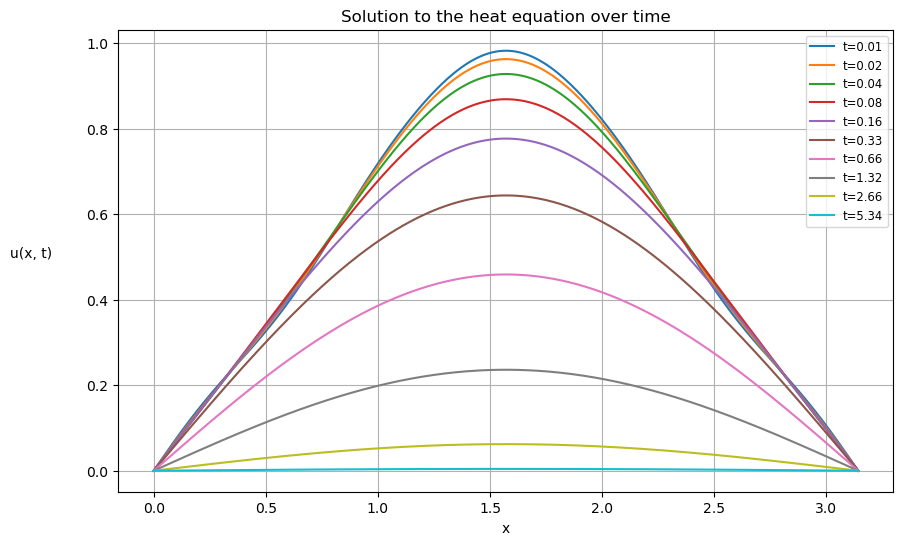

In [ ]:
L = np.pi 
k = 1     
n_terms = 10  
t_values = np.logspace(-2, 1, 100) 

x_sym = symbols('x', real=True)
n_sym = symbols('n', integer=True)

def f(x):
    return np.exp(-(x - np.pi/2)**2)

def f_sym(x):
    return sp.exp(-(x - pi/2)**2)

def compute_coefficients_symbolic(n, L):
    expr = f_sym(x_sym)
    coefficient = (2 / L) * integrate(expr * sin(n * pi * x_sym / L), (x_sym, 0, L))
    return coefficient

coefficients = [compute_coefficients_symbolic(n, L) for n in range(1, n_terms + 1)]

def compute_coefficients(n, L):
    return float(coefficients[n - 1].evalf())

def u(x, t, L, k, n_terms):
    solution = np.zeros_like(x)
    for n in range(1, n_terms + 1):
        A_n = compute_coefficients(n, L)
        solution += A_n * np.exp(-k * (n * np.pi / L)**2 * t) * np.sin(n * np.pi * x / L)
    return solution

x = np.linspace(0, L, 500)

plt.figure(figsize=(10, 6))
for t in t_values[::10]:
    plt.plot(x, u(x, t, L, k, n_terms), label=f't={t:.2f}')

plt.title('Solution to the heat equation over time')
plt.xlabel('x')
plt.ylabel('u(x, t)', rotation=0, labelpad =25)
plt.legend(loc='upper right', fontsize='small')
plt.grid()
plt.show()

In [26]:
fig, ax = plt.subplots(figsize=(10, 6))
line, = ax.plot(x, u(x, t_values[0], L, k, n_terms), color='red')
ax.set_xlim(0, L)
ax.set_ylim(np.min(u(x, t_values[0], L, k, n_terms))-0.5, np.max(u(x, t_values[0], L, k, n_terms))+0.5)
ax.set_xlabel("x")
ax.set_ylabel('u(x, t)', rotation=0, labelpad =25)
ax.grid()

def update(frame):
    t_val = t_values[frame]
    y = u(x, t_val, L, k, n_terms)
    line.set_ydata(y)
    ax.set_title(f"Solution to the heat equation at t = {t_val:.2f}")
    return line,

ani = animation.FuncAnimation(fig, update, frames=len(t_values), interval=100, blit=True)

ani.save("./diagrams/heat equation.gif", writer="pillow")
plt.close(fig)



First, we look for non-zero solutions of the form $u(x,t) = X(x) T(t)$. Substituting this ansatz into the heat equation gives us:
$$
X(x) T'(t) = k X''(x) T(t) \implies \frac{X''(x)}{X(x)} = \frac{1}{k} \frac{T'(t)}{T(t)}, \quad x \in (0, L), t \geq 0.
$$

Since the left-hand side depends only on $x$ and the right-hand side depends only on $t$, we must have $\text{LHS} = \text{RHS} = -\lambda \in \mathbb{R}$, a constant. This gives us the following pair of ODEs:
$$
X''(x) + \lambda X(x) = 0, \quad x \in (0, L)
$$
$$
T'(t) + k \lambda T(t) = 0, \quad t \geq 0.
$$

Note that these are two **eigenvalue problems**! One in $x$ and one in $t$. We also need to write down the appropriate boundary conditions.

First, note that if $u(x,t) = X(x) T(t)$, then the homogeneous boundary conditions require
$$
X(0) T(t) = 0, \quad t \geq 0,
$$
$$
X(L) T(t) = 0, \quad t \geq 0.
$$

Since we're looking for nonzero solutions, we can assume that $T(t) \neq 0$ for some $t \neq 0$. Thus, the boundary conditions reduce to
$$
X(0) = 0, \quad X(L) = 0.
$$

Thus, our task reduces to identifying non-zero solutions to
$$
\begin{cases}
X''(x) + \lambda X(x) = 0, & x \in (0, L) \\
X(0) = X(L) = 0.
\end{cases}
$$

This is an eigenvalue problem, and a corresponding set of eigenfunctions and eigenvalues are
$$
X_n(x) = a_n \sin \left( \frac{n \pi}{L} x \right), \quad \lambda_n = \left( \frac{n \pi}{L} \right)^2, \quad n = 1, 2, 3, \ldots
$$

These are nontrivial solutions to the eigenvalue problem satisfying the boundary conditions. From this, we also find that for each $n = 1, 2, 3, \ldots$,
$$
T_n(t) = b_n e^{- k \lambda_n t} = b_n e^{- n^2 \pi^2 k t / L^2}, \quad t \geq 0
$$
is a solution to the time-dependent ODE.

Thus, for each $n \in \{1,2,3, ...\}$, the function $u_n: [0,L] \times [0, \infty) \to \mathbb{R}$ given by
$$
u_n(x,t) = A_n e^{- n^2 \pi^2 k t / L^2} \sin \left( \frac{n \pi}{L} x \right), \quad x \in (0, L), t \geq 0
$$
is a nontrivial solution, satisfying the heat equation and homogeneous boundary conditions.

The heat equation is a linear equation, so by the superposition principle:
$$
u(x,t) = \sum_{n =1}^\infty A_n e^{- n^2 \pi^2 k t / L^2} \sin \left( \frac{n \pi}{L} x \right), \quad x \in (0, L), t \geq 0
$$
is also a solution. Notice that we have yet to specify the constants $A_n$; this is where we use the initial condition.

To satisfy the initial condition, we expand $f: [0,L] \to \mathbb{R}$ in terms of its **half-range Fourier sine series**:
$$
f(x) = \sum_{n=1}^\infty B_n \sin \left( \frac{n \pi }{L} x\right), \quad x \in (0, L).
$$

Then, by imposing the initial condition, we must have:=
$$
u(x, 0) = \sum_{n=1}^\infty A_n \sin \left( \frac{n \pi}{L} x \right) = \sum_{n=1}^\infty B_n \sin \left( \frac{n \pi }{L} x\right), \quad x \in (0, L)
\implies A_n = B_n, \quad \text{for each } n.
$$

This shows that the coefficients $A_n$ must be chosen to match the Fourier sine coefficients of $f$!

The (unique) solution to the heat equation, satisfying the homogeneous boundary conditions and the initial condition, is then given by:
$$
u(x,t) = \sum_{n =1}^\infty \left( \frac{2}{L} \int_0^L f(x) \sin \left( \frac{n \pi}{L} x \right) \; dx \right) e^{- n^2 \pi^2 k t / L^2} \sin \left( \frac{n \pi}{L} x \right), \quad x \in (0, L), t \geq 0.
$$

Due to the presence of the exponentially decaying term in time, we see that $u(\cdot,t) \to 0$ as $t \to \infty$.


#### Uniqueness (Optional)

To argue that $u : [0,L] \times [0,\infty) \to \mathbb{R}$ given above is the *unique* solution to the PDE requires more analysis. Here we use a so-called *energy method*. Suppose $v: [0,L] \times [0,\infty) \to \mathbb{R}$ is another solution satisfying the same PDE and boundary conditions. Then the difference $w: [0,L] \times [0,\infty) \to \mathbb{R} $ defined via $w(x,t) := u(x,t) - v(x,t)$ satisfies 
$$
w_t(x,t) = k w_{xx}(x,t), \quad x \in (0, L), \; t \geq 0, \; k > 0
$$
with the homogeneous boundary conditions
$$
w(0, t) = 0 = w(L, t), \quad t \geq 0
$$
and the homogeneous initial condition
$$
w(x, 0) = 0, \quad x \in (0, L).
$$
We can prove uniqueness if we can show that $w \equiv 0$, which implies that $u = v$. Consider the energy functional $E: [0,\infty) \to \mathbb{R}$ defined via
$$
E(t) = \frac{1}{2} \int_0^L w^2(x,t) \; dx.
$$
Then
$$
E'(t) = \int_0^L w(x,t) \underbrace{w_t(x,t)}_{= k w_{xx}(x,t)} \; dx = k \int_0^L w(x,t) w_{xx}(x,t) \; dx = - k \int_0^L (w_x(x,t))^2 \; dx,
$$
where we used integration by parts to obtain the last equality, and the boundary terms vanished because of the homogeneous boundary conditions. Since $k > 0$, we have $E' \leq 0$. Thus
$$
0 \leq \frac{1}{2} \int_0^L w^2(x,t) \; dx = E(t) \leq E(0) = 0,
$$
where the last equality follows from the homogeneous initial condition $w(x, 0) = 0$. This shows that $E \equiv 0$, and since $w^2 \geq 0$, this is possible if and only if $w(x,t) = 0$ for all $x \in [0, L]$ and all $t \geq 0$.

#### Separation of variables for the wave equation

Now consider the wave equation with homogeneous Dirichlet conditions:
$$
u_{tt}(x, t) = \alpha^2 u_{xx}(x, t), \quad x \in (0, L), \; t \geq 0, \; \alpha > 0
$$
$$
u(0, t) = 0 = u(L, t), \quad t \geq 0 \quad \text{(homogeneous boundary conditions)}
$$
$$
u(x, 0) = f(x), \quad x \in (0, L) \quad \text{(initial condition on } u)
$$
$$
u_t(x, 0) = g(x), \quad x \in (0, L) \quad \text{(initial condition on } u_t).
$$

The solution to the wave equation describe the evolution of a vibrating string of length $L$ with fixed endpoints. The initial conditions specify the initial shape of the string and its initial velocity profile.

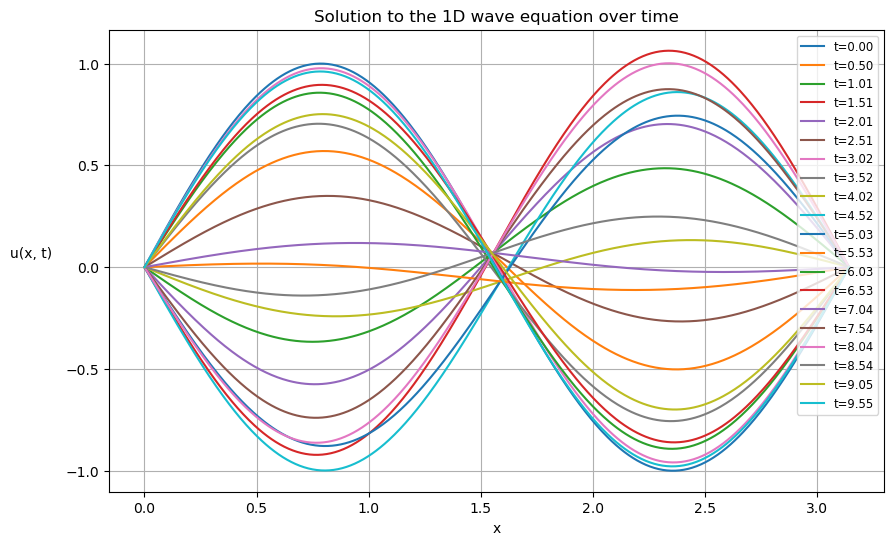

In [56]:
alpha = 1 
n_terms = 10  

x_sym = symbols('x', real=True)
n_sym = symbols('n', integer=True)
L_num = np.pi     
L_sym = sp.pi    

def f(x):
    return np.sin(2*x) 

def f_sym(x):
    return sp.sin(2*x) 

def g(x):
    return 0.1*np.sin(x)

def g_sym(x):
    return 0.1*sp.sin(x)

A_coeff = []
B_coeff = []

for n in range(1, n_terms+1):
    k_n = n*sp.pi/L_sym
    A_n = (2/L_sym) * sp.integrate(f_sym(x_sym) * sp.sin(k_n*x_sym),
                                   (x_sym, 0, L_sym))
    B_n = (2/(alpha * k_n * L_sym)) * sp.integrate(g_sym(x_sym) * sp.sin(k_n*x_sym),
                                                   (x_sym, 0, L_sym))
    A_coeff.append(float(A_n))  
    B_coeff.append(float(B_n))

def u_wave(x, t, alpha, n_terms):
    sol = np.zeros_like(x)
    for n in range(1, n_terms+1):
        k = n*np.pi/L_num
        sol += (A_coeff[n-1] * np.cos(alpha * k * t)
              + B_coeff[n-1] * np.sin(alpha * k * t)) * np.sin(k*x)
    return sol

x_wave = np.linspace(0, L, 500)
t_wave = np.linspace(0, 10, 200)

plt.figure(figsize=(10, 6))
for t in t_wave[::10]:
    plt.plot(x_wave, u_wave(x_wave, t, alpha, n_terms), label=f't={t:.2f}')

plt.title('Solution to the 1D wave equation over time')
plt.xlabel('x')
plt.ylabel('u(x, t)', rotation=0, labelpad=25)
plt.legend(loc='upper right', fontsize='small')
plt.grid()
plt.show()


In [57]:
fig_wave, ax_wave = plt.subplots(figsize=(10, 6))
line_wave, = ax_wave.plot(x_wave, u_wave(x_wave, t_wave[0], alpha, n_terms), color='blue')
ax_wave.set_xlim(0, L)
y0 = u_wave(x_wave, t_wave[0], alpha, n_terms)
ax_wave.set_ylim(-2,2)
ax_wave.set_xlabel("x")
ax_wave.set_ylabel("u(x, t)", rotation=0, labelpad=25)
ax_wave.grid()

def update_wave(frame):
    t_val = t_wave[frame]
    y = u_wave(x_wave, t_val, alpha, n_terms)
    line_wave.set_ydata(y)
    ax_wave.set_title(f"Solution to the wave equation at t = {t_val:.2f}")
    return line_wave,

ani_wave = animation.FuncAnimation(fig_wave, update_wave, frames=len(t_wave), interval=100, blit=True)
ani_wave.save("./diagrams/wave_equation.gif", writer="pillow")
plt.close(fig_wave)


We again look for solutions of the form $u(x,t) = X(x) T(t)$. Substituting this ansatz into the wave equation gives us:
$$
X(x) T''(t) = \alpha^2 X''(x) T(t) \implies \frac{X''(x)}{X(x)} =  \frac{T''(t)}{\alpha^2 T(t)} = - \lambda \in \mathbb{R}.
$$
This gives us a pair of ODEs,
$$
X''(x) + \lambda X(x) = 0, \quad x \in (0, L)
$$
$$
T''(t) + \alpha^2 \lambda T(t) = 0, \quad t \geq 0.
$$

The same analysis for the heat equation carries over and $\lambda$ must be positive for $u$ to be nontrivial. The solutions to the ODEs are:
$$
X(x) = c_1 \cos(\sqrt{\lambda} x) + c_2 \sin(\sqrt{\lambda} x), \quad x \in (0, L)
$$
$$
T(t) = c_3 \cos(\alpha \sqrt{\lambda} t) + c_4 \sin(\alpha \sqrt{\lambda} t), \quad t \geq 0.
$$
Arguing as before, we find that:
$$
u(x,t) = \sum_{n=1}^\infty \left( A_n \cos\left(\frac{\alpha n \pi t}{L} \right) + B_n \sin \left(\frac{\alpha n \pi t}{L} \right) \right) \sin \left( \frac{n \pi x}{L} \right)
$$
is a solution to the wave equation, satisfying the homogeneous boundary conditions.

For the initial conditions, we expand $f$ and $g$ in terms of their Fourier sine series:
$$
f(x) = \sum_{n=1}^\infty C_n \sin \left( \frac{n \pi x}{L} \right), \quad x \in (0, L)
$$
$$
g(x) = \sum_{n=1}^\infty D_n \sin \left( \frac{n \pi x}{L} \right), \quad x \in (0, L).
$$
We find that:
$$
A_n = C_n, \quad \frac{\alpha n \pi}{L} B_n = D_n \implies B_n = \frac{L}{\alpha n \pi} D_n.
$$
This choice of $A_n$ and $B_n$ gives us a solution satisfying all the conditions.

The (unique) solution is then given by:
$$
u(x,t) = \sum_{n=1}^\infty \bigg[ \bigg( \frac{2}{L} \int_0^L f(x) \sin \left( \frac{n \pi x}{L} \right) \; dx \bigg) \cos\bigg(\frac{\alpha n \pi t}{L} \bigg) + \frac{L}{\alpha n \pi} \bigg( \frac{2}{L} \int_0^L g(x) \sin \left( \frac{n \pi x}{L} \right) \; dx \bigg) \sin \left(\frac{\alpha n \pi t}{L} \right) \bigg] \sin \left( \frac{n \pi x}{L} \right).
$$

If $g= 0$, then the solution reduces to:
$$
u(x,t) = \sum_{n=1}^\infty \bigg[ \bigg( \frac{2}{L} \int_0^L f(x) \sin \left( \frac{n \pi x}{L} \right) \; dx \bigg) \cos\bigg(\frac{\alpha n \pi t}{L} \bigg) \bigg] \sin \left( \frac{n \pi x}{L} \right).
$$

Also note that, unlike the solution to the heat equation, we do not have an exponentially decaying factor in time, so we do not expect solutions to vanish over time.


#### Uniqueness (Optional)

Suppose $v: [0,L] \times [0,\infty) \to \mathbb{R}$ is another solution to the wave equation, satisfying the same boundary and initial conditions. Then $w : [0,L] \times [0,\infty) \to \mathbb{R}$ defined via $w(x,t) = u(x,t) - v(x,t)$ satisfies 
$$
w_{tt}(x,t) = \alpha^2 w_{xx}(x,t), \quad x \in (0, L), \; t \geq 0, \; \alpha > 0
$$
with the boundary condition
$$
w(0, t) = 0 = w(L, t), \quad t \geq 0
$$
and the homogeneous initial condition
$$
w(x, 0) = 0, w_t(x, 0) = 0, \quad x \in (0, L).
$$
Define the energy functional $E: [0,\infty) \to \mathbb{R}$ via
$$
E(t) = \frac{1}{2} \int_0^L \left( w_t^2(x,t) + \alpha^2 w_x^2(x,t) \right) \, dx.
$$
Then
$$
\begin{aligned}
E'(t) &= \int_0^L \left( w_t(x,t) w_{tt}(x,t) + \alpha^2 w_x(x,t) w_{xt}(x,t) \right) \, dx \\
&= \int_0^L \left( w_t(x,t) w_{tt}(x,t) - \alpha^2 w_{xx}(x,t) w_t(x,t) \right) \, dx \quad (\text{by integration by parts in } x) \\
&= \int_0^L w_t(x,t) \left( \underbrace{w_{tt}(x,t) - \alpha^2 w_{xx}(x,t)}_{=0} \right) \, dx = 0,
\end{aligned}
$$
where the boundary terms vanish because $w(x,t) = 0$ for all $t$ at $x = 0, L$, implying that $w_t(x,t) = 0$ for $x = 0, L$. Then $E(t) = E(0) = 0$ by the homogeneous initial conditions. This is only possible if $w_t(x,t) = 0$ and $w_x(x,t) = 0$ for all $x \in [0,L]$, $t \geq 0$. Since $w(x,t) = 0$ at the boundary, this is possible if and only if $w(x,t) \equiv 0$ for all $x \in [0, L]$, $t \geq 0$.

#### Summary

The method of separation of variables can be summarized as follows.

- Step 1: Decouple the PDE into two ODEs by using the ansatz $u(x,t) = X(x) T(t)$.
- Step 2: Solve an eigenvalue problem and use the homogeneous boundary conditions to identify constraints on $\lambda$.
- Step 3: Write down a solution in terms of an infinite series.
- Step 4: Use the Fourier series of the inhomogeneous data $f(\cdot)$ to choose the coefficients $A_n$ (and in the case of the wave equation, use $g(\cdot)$ to determine $B_n$).


**Remark:** We note that this technique depends on the geometry of the underlying domain and the boundary conditions imposed on it. For example, if we try to solve the heat or wave equation on the entire real line, then we would need to use a different set of techniques. 


**Remark:** This idea of using eigenfunctions of $-\partial_{xx}$ to solve PDEs on bounded intervals can be generalized in higher dimensions, using the so-called **spectral theorem for compact linear operators**.


> **Theorem (Spectral theorem for compact self-adjoint operators):**
> Let $H$ be a separable Hilbert space and let $T: H \to H$ be a compact self-adjoint operator. Then there exists a countable orthonormal basis of $H$ consisting of eigenvectors of $T$.

This result is often applied to linear PDEs with homogeneous Dirichlet boundary conditions of the form 
$$
\begin{cases}
L u(x) = f(x), & x \in \Omega \subseteq \mathbb{R}^n \\
u(x) = 0, & x \in \partial \Omega.
\end{cases}
$$

This also provides a version of a "generalized Fourier series," using the eigenfunctions of the linear operator $T$. 


### Examples

Next we'll consider a few concrete examples, where the data is either already in terms of its Fourier series, or the Fourier sine series is given.


> **Example (Heat equation)** Consider the following system:
> $$
> \begin{cases}
> \partial_t u(x, t) = \partial_{xx} u(x, t), & x \in (0, L), \; t \geq 0, \\
> u(0, t) = 0 = u(\pi, t), &  t \geq 0 \quad \text{(homogeneous boundary conditions)}, \\
> u(x, 0) = x(\pi - x) = \sum_{m=1}^\infty \frac{8}{\pi(2m-1)^3} \sin((2m-1)x), &  x \in (0, \pi) \quad \text{(initial condition)}.
> \end{cases}
> $$
> The solution to this system is given by
> $$
> u(x, t) = \sum_{n=1}^\infty A_n e^{-n^2 t} \sin(n x),
> $$
> where the $A_n$'s are equal to the Fourier sine coefficients of $x(\pi - x)$. By looking at the initial condition, we see that the Fourier sine series of $x(\pi - x)$ is given by:
> $$
> x(\pi - x) = \sum_{n=1}^\infty B_n \sin(n x),
> $$
> where:
> $$
> \begin{cases}
> B_n = 0, & \text{if } n \text{ is even}, \\
> B_n = \frac{8}{\pi(2m-1)^3}, & \text{if } n = 2m-1 \text{ is odd}, \; m = 1, 2, 3, \ldots
> \end{cases}
> $$
> Since $A_n$'s are chosen such that $A_n = B_n$, the solution to the system is given by:
> $$
> u(x, t) = \sum_{m=1}^\infty \frac{8}{\pi(2m-1)^3} e^{-(2m-1)^2 t} \sin((2m-1)x).
> $$


> **Example (Wave equation)** Consider the following system
> $$
> \begin{cases}
> \partial_{tt} u(x, t) = 9 \partial_{xx} u(x, t), & x \in (0, \pi), \; t \geq 0, \\
> u(0, t) = 0 = u(\pi, t), & t \geq 0 \quad \text{(homogeneous boundary conditions)}, \\
> u(x, 0) = \sin(2x), & x \in (0, \pi) \quad \text{(initial condition on } u), \\
> \partial_t u(x, 0) = \sin(3x), & x \in (0, \pi) \quad \text{(initial condition on } \partial_t u).
> \end{cases}
> $$
> The solution to this system is given by
> $$
> u(x, t) = \sum_{n=1}^\infty \left(A_n \cos(3n t) + B_n \sin(3n t)\right) \sin(n x),
> $$
> where $A_n$'s are equal to the Fourier sine coefficients of $\sin(2x)$, and $B_n$'s are equal to $\frac{1}{3n}$ times the Fourier coefficients of $\sin(3x)$. Notice that $\sin(2x)$ and $\sin(3x)$ are already given in terms of their Fourier sine series. If we write:
> $$
> \sin(2x) = \sum_{n=1}^\infty C_n \sin(n x),
> $$
> we find that:
> $$
> \begin{cases}
> C_n = 0, & n \neq 2, \\
> C_n = 1, & n = 2.
> \end{cases}
> $$
> Analogously, if we write:
> $$
> \sin(3x) = \sum_{n=1}^\infty D_n \sin(n x),
> $$
> we find that:
> $$
> \begin{cases}
> D_n = 0, & n \neq 3, \\
> D_n = 1, & n = 3.
> \end{cases}
> $$
> This means that we can choose
> $$
> \begin{cases}
> A_n = 0, & n \neq 2, \\
> A_n = 1, & n = 2,
> \end{cases}
> $$
> and
> $$
> \begin{cases}
> B_n = 0, & n \neq 3, \\
> B_n = \frac{1}{9}, & n = 3.
> \end{cases}
> $$
> to form the unique solution. Thus, the solution to the system is given by
> $$
> u(x, t) = \sum_{n=1}^\infty \left(A_n \cos(3n t) + B_n \sin(3n t)\right) \sin(n x) =  \cos(6t) \sin(2x) + \frac{1}{9} \sin(9t) \sin(3x).
> $$

### Laplace's equation

Next we study Laplace's equation on a rectangle with Dirichlet boundary conditions. We consider the equation 

$$
-\Delta u(x, y) = -(\partial_x^2 u(x, y) + \partial_y^2 u(x, y)) = 0, \quad \text{for } 0 < x < a, \; 0 < y < b
$$
with the boundary conditions 
$$
u(x, y = b) = f(x), \quad \text{for all } 0 < x < a
$$
$$
u(x, y = 0) = g(x), \quad \text{for all } 0 < x < a
$$
$$
u(x = 0, y) = 0, \quad \text{for all } 0 < y < b
$$
$$
u(x = a, y) = 0, \quad \text{for all } 0 < y < b
$$

We use the same method of separation of variables to build a solution to the equation, satisfying the given boundary conditions.

**Step 1: Decouple the PDE into two ODEs by using the ansatz $u(x, y) = X(x) Y(y)$.**

We first look for all nonzero solutions by considering solutions of the form $u(x, y) = X(x) Y(y)$. Substituting this into the PDE gives us:

$$
X''(x) Y(y) + X(x) Y''(y) = 0, \quad x \in (0, a), \; y \in (0, b)
$$

$$
\implies \frac{X''(x)}{X(x)} = - \frac{Y''(y)}{Y(y)}, \quad x \in (0, a), \; y \in (0, b)
$$

Note that the left-hand side is a function of $x$, and the right-hand side is a function of $y$; this is only possible if both are constant functions. So we can conclude that:

$$
\frac{X''(x)}{X(x)} = - \frac{Y''(y)}{Y(y)} = - \lambda \in \mathbb{R}, \quad x \in (0, a), \; y \in (0, b)
$$

for some constant $\lambda \in \mathbb{R}$. This gives us a pair of ODEs

$$
X''(x) + \lambda X(x) = 0, \quad x \in (0, a)
$$

$$
Y''(y) - \lambda Y(y) = 0, \quad y \in (0, b)
$$


**Step 2: Use the homogeneous boundary conditions to identify constraints on $\lambda$.**

If $u(x, y) = X(x) Y(y)$ is a nonzero solution and we require:

$$
u(x = 0, y) = X(0) Y(y) = 0, \quad \text{for all } 0 < y < b
$$

$$
u(x = a, y) = X(a) Y(y) = 0, \quad \text{for all } 0 < y < b
$$

then this translates to requiring:

$$
X(0) = 0 \; \text{and} \; X(a) = 0
$$

Since $X(x)$ satisfies $X''(x) + \lambda X(x) = 0$, by using the second-order ODE theory, we can write down $X(x)$ explicitly. The explicit solution formula for $X(x)$ depends on whether $\lambda < 0$, $\lambda = 0$, or $\lambda > 0$. By following the same type of analysis that we did for the heat and wave equations, we see that $\lambda$ must be positive for $X(x)$ to be nontrivial. In that case, we find that $X(x)$ is given by:

$$
X(x) = c_1 \cos(\sqrt{\lambda} x) + c_2 \sin(\sqrt{\lambda} x), \quad x \in (0, a)
$$

The condition $X(0) = 0$ tells us that $c_1 = 0$, and $X(a) = 0$ can only be satisfied if $\sqrt{\lambda} \cdot a$ is equal to an integer multiple of $\pi$. Thus, $\lambda$ must satisfy:

$$
\sqrt{\lambda} \cdot a = n \pi, \quad n \in \mathbb{Z}^+
$$

Parametrizing $\lambda$ in terms of $n$, we find:

$$
\lambda_n = \frac{n^2 \pi^2}{a^2}, \quad n = 1, 2, 3, \ldots
$$

For each $n = 1, 2, 3, \ldots$, $X_n(x) = c_n \sin\left(\frac{n \pi x}{a}\right)$ is a solution to the ODE for $X(x)$. Similarly, for these values of $\lambda$, by solving the ODE for $Y(y)$, we find:

$$
Y_n(y) = a_n e^{\sqrt{\lambda_n} y} + b_n e^{-\sqrt{\lambda_n} y}, \quad y \in (0, b)
$$

To simplify our analysis, it is convenient to write $Y_n(y)$ in terms of the hyperbolic trigonometric functions:

$$
\cosh(x) = \frac{1}{2} \left(e^x + e^{-x}\right), \quad \sinh(x) = \frac{1}{2} \left(e^x - e^{-x}\right)
$$

Using this, we can write:

$$
Y_n(y) = \tilde{a}_n \cosh\left(\sqrt{\lambda_n} y\right) + \tilde{b}_n \sinh\left(\sqrt{\lambda_n} y\right), \quad y \in (0, b)
$$

Thus, for each $n = 1, 2, 3, \ldots$, we find:

$$
u_n(x, y) = X_n(x) Y_n(y) = \left(A_n \cosh\left(\frac{n \pi y}{a}\right) + B_n \sinh\left(\frac{n \pi y}{a}\right)\right) \sin\left(\frac{n \pi x}{a}\right)
$$

is a nontrivial solution satisfying the PDE and homogeneous boundary conditions. By linearity, we find that:

$$
u(x, y) = \sum_{n=1}^\infty u_n(x, y) = \sum_{n=1}^\infty \left(A_n \cosh\left(\frac{n \pi y}{a}\right) + B_n \sinh\left(\frac{n \pi y}{a}\right)\right) \sin\left(\frac{n \pi x}{a}\right)
$$

is also a nontrivial solution.


**Step 3: Use the inhomogeneous data to choose the coefficients $A_n, B_n$.**

Now we use the inhomogeneous boundary conditions:

$$
u(x, y = b) = f(x), \quad \text{for all } 0 < x < a
$$

$$
u(x, y = 0) = g(x), \quad \text{for all } 0 < x < a
$$

to identify the coefficients $A_n, B_n$. If:

$$
u(x, y) = \sum_{n=1}^\infty \left(A_n \cosh\left(\frac{n \pi y}{a}\right) + B_n \sinh\left(\frac{n \pi y}{a}\right)\right) \sin\left(\frac{n \pi x}{a}\right)
$$

then the inhomogeneous boundary conditions translate to requiring:

$$
u(x, y = b) = \sum_{n=1}^\infty \left(A_n \cosh\left(\frac{n \pi b}{a}\right) + B_n \sinh\left(\frac{n \pi b}{a}\right)\right) \sin\left(\frac{n \pi x}{a}\right) = f(x)
$$

and:

$$
u(x, y = 0) = \sum_{n=1}^\infty A_n \sin\left(\frac{n \pi x}{a}\right) = g(x)
$$

By writing $f$ and $g$ in terms of their Fourier sine series,

$$
f(x) = \sum_{n=1}^\infty C_n \sin\left(\frac{n \pi x}{a}\right), \quad C_n = \frac{2}{a} \int_0^a f(x) \sin\left(\frac{n \pi x}{a}\right) \, dx
$$

$$
g(x) = \sum_{n=1}^\infty D_n \sin\left(\frac{n \pi x}{a}\right), \quad D_n = \frac{2}{a} \int_0^a g(x) \sin\left(\frac{n \pi x}{a}\right) \, dx,,
$$

we find that $A_n = D_n$ and

$$
B_n = \frac{1}{\sinh\left(\frac{n \pi b}{a}\right)} \left(C_n - A_n \cosh\left(\frac{n \pi b}{a}\right)\right).
$$


**Step 4: Synthesis**

By putting everything together, we find that the most general solution satisfying the PDE, homogeneous boundary conditions, and inhomogeneous boundary conditions is given by

$$
u(x, y) = \sum_{n=1}^\infty \left(A_n \cosh\left(\frac{n \pi y}{a}\right) + B_n \sinh\left(\frac{n \pi y}{a}\right)\right) \sin\left(\frac{n \pi x}{a}\right)
$$

where

$$
A_n = \frac{2}{a} \int_0^a g(x) \sin\left(\frac{n \pi x}{a}\right) \, dx
$$

$$
B_n = \frac{1}{\sinh\left(\frac{n \pi b}{a}\right)} \left(\frac{2}{a} \int_0^a f(x) \sin\left(\frac{n \pi x}{a}\right) \, dx - \frac{2}{a} \int_0^a g(x) \sin\left(\frac{n \pi x}{a}\right) \, dx \cdot \cosh\left(\frac{n \pi b}{a}\right)\right).
$$


**Remark:**  If $g = 0$, then $A_n = 0$ for all $n$ and  
$$
B_n = \frac{1}{\sinh \left( \frac{n \pi b}{a} \right)} \cdot \frac{2}{a} \int_0^a f(x)  \sin \left( \frac{n \pi x}{a} \right) \; dx, \quad x \in [0, a],
$$  
so  
$$
u(x, y) = \sum_{n=1}^\infty  \left(   \frac{2}{a \sinh \left( \frac{n \pi b}{a} \right)}  \int_0^a f(x)  \sin \left( \frac{n \pi x}{a} \right) \; dx \cdot \sinh \left( \frac{n \pi y}{a} \right) \right) \sin \left( \frac{n \pi x}{a} \right), \quad x \in [0, a], \; y \in [0, b].
$$  

**Remark:** In the example above we assumed homogeneous Dirichlet conditions on the lateral sides of the rectangle; to solve the full inhomogeneous problem:  
$$
\begin{cases}
-\Delta u(x, y) = -(\partial_x^2 u(x, y) + \partial_y^2 u(x, y)) = 0, & \text{for } x \in (0, a), \; y \in (0, b), \\
u(x, y = b) = f(x), & \text{for all } x \in (0, a), \\
u(x, y = 0) = g(x), & \text{for all } x \in (0, a), \\
u(x = 0, y) = F(y), & \text{for all } y \in (0, b), \\
u(x = a, y) = G(y), & \text{for all } y \in (0, b),
\end{cases}
$$  
one can decompose this into two subsystems

$$
\begin{cases}
-\Delta u_1(x, y) = -(\partial_x^2 u_1(x, y) + \partial_y^2 u_1(x, y)) = 0, & \text{for } x \in (0, a), \; y \in (0, b), \\
u_1(x, y = b) = f(x), & \text{for all } x \in (0, a), \\
u_1(x, y = 0) = g(x), & \text{for all } x \in (0, a), \\
u_1(x = 0, y) = 0, & \text{for all } y \in (0, b), \\
u_1(x = a, y) = 0, & \text{for all } y \in (0, b),
\end{cases}
$$  

and  

$$
\begin{cases}
-\Delta u_2(x, y) = -(\partial_x^2 u_2(x, y) + \partial_y^2 u_2(x, y)) = 0, & \text{for } x \in (0, a), \; y \in (0, b), \\
u_2(x, y = b) = 0, & \text{for all } x \in (0, a), \\
u_2(x, y = 0) = 0, & \text{for all } x \in (0, a), \\
u_2(x = 0, y) = F(y), & \text{for all } y \in (0, b), \\
u_2(x = a, y) = G(y), & \text{for all } y \in (0, b),
\end{cases}
$$  

and recover the solution to the original system by considering $u(x, y) = u_1(x, y) + u_2(x, y)$. One can easily check that $u(x, y)$ satisfies the full system by linearity.

We'll conclude this notebook by considering one final example.

> **Example:**  Consider the Dirichlet problem  
> $$  
> -\Delta u(x, y) = -(\partial_x^2 u(x, y) + \partial_y^2 u(x, y)) = 0, \quad x \in (0, 2\pi), \; y \in (0, \pi)  
> $$  
> $$  
> u(x, \pi) = \sin(x), \quad x \in (0, 2\pi)  
> $$  
> $$  
> u(x, 0) = 0, \quad x \in (0, 2\pi)  
> $$  
> $$  
> u(0, y) = 0, \quad y \in (0, \pi)  
> $$  
> $$  
> u(2\pi, y) = 0, \quad y \in (0, \pi).  
> $$  
> The solution to this is given by  
> $$  
> u(x, y) = \sum_{n=1}^\infty A_n \sinh\left(\frac{n y}{2}\right) \sin\left(\frac{n x}{2}\right),  
> $$  
> where $A_n$'s are equal to $\frac{1}{\sinh(n \pi / 2)}$ times the Fourier sine coefficients of $\sin(x)$. If we write  
> $$  
> \sin(x) = \sum_{n=1}^\infty B_n \sin\left(\frac{n x}{2}\right),  
> $$  
> we find that  
> $$  
> B_n =  
> \begin{cases}  
> 0, & n \neq 2 \\  
> 1, & n = 2.  
> \end{cases}  
> $$  
> Thus,  
> $$  
> A_n =  
> \begin{cases}  
> 0, & n \neq 2 \\  
> \frac{1}{\sinh(\pi)}, & n = 2.  
> \end{cases}  
> $$  
> Then the solution to the system is given by  
> $$  
> u(x, y) = \frac{1}{\sinh(\pi)} \sinh(y) \sin(x).  
> $$  